In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import json
%matplotlib inline

In [6]:
RESULTS_DIR = '/cluster/tufts/hugheslab/prath01/results/mimic3/rnn/'

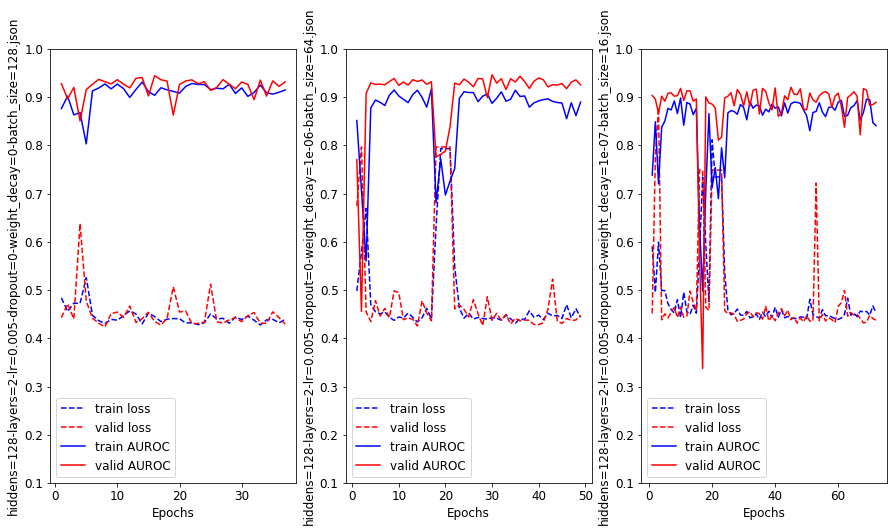

In [23]:
rnn_hists_json = glob.glob(os.path.join(RESULTS_DIR, 'hiddens=128*lr=0.005*dropout=0-*.json'))
rnn_hists_json = [i for i in rnn_hists_json if 'history' not in i]
rnn_hists_json.sort()


f, axs= plt.subplots(1, len(rnn_hists_json),figsize=(15,8))

axs_list = axs.flatten()
for i, rnn_hist_json in enumerate(rnn_hists_json):

    with open(rnn_hist_json, 'r') as f:
        rnn_dict = json.load(f)
    epochs=[i['epoch'] for i in rnn_dict[:-1]]
    train_loss = [i['train_loss'] for i in rnn_dict[:-1]]
    valid_loss = [i['valid_loss'] for i in rnn_dict[:-1]]
    aucroc_score_train = [i['aucroc_score_train'] for i in rnn_dict[:-1]]
    aucroc_score_valid = [i['aucroc_score_valid'] for i in rnn_dict[:-1]]

#     f, axs = plt.subplots(2,1,figsize=(12,10), sharex=True)
    plt.rcParams.update({'font.size': 12})
    axs_list[i].plot(epochs, train_loss, 'b--', label='train loss')
    axs_list[i].plot(epochs, valid_loss, 'r--', label='valid loss')
    axs_list[i].set_xlabel('Epochs')
#     axs_list[i].set_ylabel('Loss')
    axs_list[i].plot(epochs, aucroc_score_train, 'b', label='train AUROC')
    axs_list[i].plot(epochs, aucroc_score_valid, 'r', label='valid AUROC')
    axs_list[i].set_xlabel('Epochs')
    axs_list[i].legend()
    axs_list[i].set_ylim([0.1, 1])
    axs_list[i].set_ylabel(rnn_hists_json[i].split('/')[-1])

plt.show()

In [15]:
rnn_hists_json = glob.glob(os.path.join(RESULTS_DIR, 'hiddens=128*dropout=0-*.json'))

rnn_hists_json

['/cluster/tufts/hugheslab/prath01/results/mimic3/rnn/hiddens=128-layers=2-lr=0.005-dropout=0-weight_decay=0-batch_size=128.json',
 '/cluster/tufts/hugheslab/prath01/results/mimic3/rnn/hiddens=128-layers=2-lr=0.0001-dropout=0-weight_decay=0-batch_size=32.json',
 '/cluster/tufts/hugheslab/prath01/results/mimic3/rnn/hiddens=128-layers=2-lr=0.0001-dropout=0-weight_decay=1e-07-batch_size=128.json',
 '/cluster/tufts/hugheslab/prath01/results/mimic3/rnn/hiddens=128-layers=2-lr=0.001-dropout=0-weight_decay=1e-06-batch_size=128.json',
 '/cluster/tufts/hugheslab/prath01/results/mimic3/rnn/hiddens=128-layers=2-lr=0.005-dropout=0-weight_decay=1e-07-batch_size=16.json',
 '/cluster/tufts/hugheslab/prath01/results/mimic3/rnn/hiddens=128-layers=2-lr=0.005-dropout=0-weight_decay=1e-06-batch_size=64.json',
 '/cluster/tufts/hugheslab/prath01/results/mimic3/rnn/hiddens=128-layers=2-lr=0.0005-dropout=0-weight_decay=1e-06-batch_size=128.json']

In [90]:
rnn_hists_json = glob.glob(os.path.join(RESULTS_DIR, 'hiddens=*.json'))
roc_scores = list()
model_names = list()

for i, rnn_hist_json in enumerate(rnn_hists_json):
    with open(rnn_hist_json, 'r') as f:
        rnn_dict = json.load(f)
    epochs=[i['epoch'] for i in rnn_dict[:-1]]
    train_loss = [i['train_loss'] for i in rnn_dict[:-1]]
    valid_loss = [i['valid_loss'] for i in rnn_dict[:-1]]
    aucroc_score_train = [i['aucroc_score_train'] for i in rnn_dict[:-1]]
    aucroc_score_valid = [i['aucroc_score_valid'] for i in rnn_dict[:-1]]
    roc_scores.append(aucroc_score_valid[-1])
    model_names.append(rnn_hist_json)

In [91]:
best_ind = np.argmax(roc_scores)
model_names[best_ind]

'/cluster/tufts/hugheslab/prath01/results/mimic3/rnn/hiddens=128-layers=2-lr=0.005-dropout=0-weight_decay=1e-05-batch_size=1024.json'